In [173]:
# Drew Lesh
# 11/06/25
# IBM Data Analyst Capstone Project - Data Visualization
# Histograms

In [174]:
# download database
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-18 23:49:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  29.0MB/s    in 7.5s    

2025-11-18 23:49:39 (27.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



In [175]:
# !pip install pandas
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [176]:
# connect to database
conn = sqlite3.connect('survey-data.sqlite')

In [177]:
## DEMO: Basic SQL Queries
# Count the number of rows in the table

QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


In [178]:
# 2. List all Tables
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


In [179]:
# 3. Group Data by Age
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


Original Count: 33740
No outliers Count: 27864


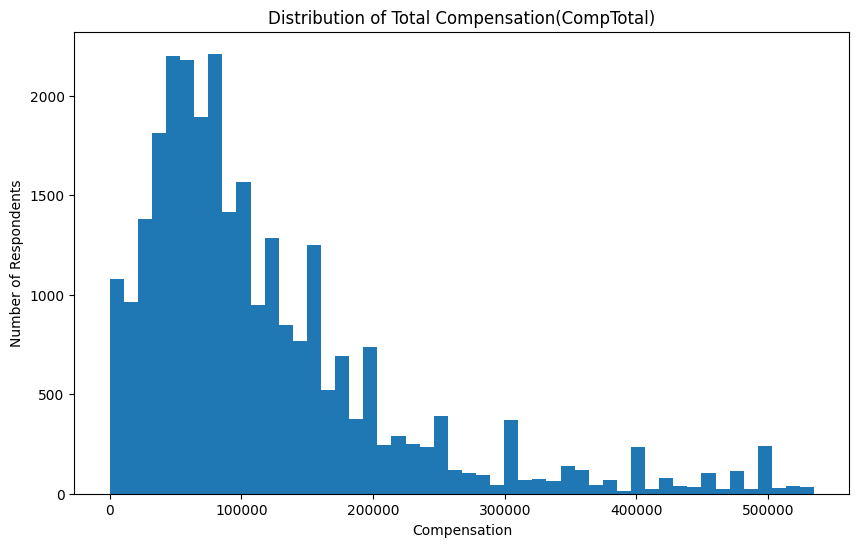

In [180]:
## Visualizing the distribution of data ( Histogram )
# Histogram of Total Compensation

# 1. Query Data
QUERY =  """
SELECT CompTotal
FROM main
"""

# 2. Connect query to a dataframe
total_comp_df = pd.read_sql_query(QUERY, conn)

# 3. Clean Data
total_comp_df = total_comp_df.dropna(subset=['CompTotal'])

Q1 = total_comp_df['CompTotal'].quantile(0.25)
Q3 = total_comp_df['CompTotal'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

total_comp_df_filtered = total_comp_df[(total_comp_df['CompTotal'] >= lower_bound) & (total_comp_df['CompTotal'] <= upper_bound)]
print('Original Count:', len(total_comp_df))
print('No outliers Count:', len(total_comp_df_filtered))
# 4. Histogram Plot
plt.figure(figsize=(10,6))
plt.hist(total_comp_df_filtered['CompTotal'], bins=50)
plt.title('Distribution of Total Compensation(CompTotal)')
plt.xlabel('Compensation')
plt.ylabel('Number of Respondents')
plt.show()


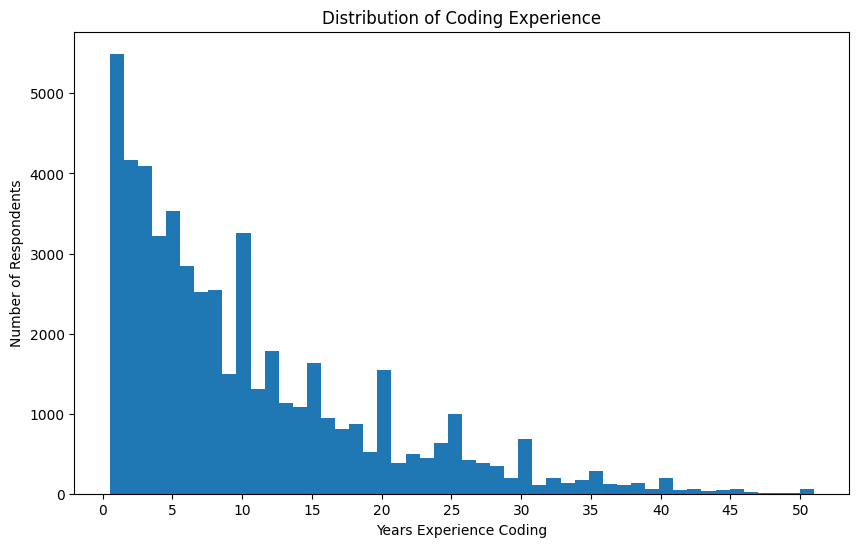

In [181]:
# Histogram of YearsCodePro

# 1. Query Data
QUERY = "SELECT YearsCodePro FROM main"

# 2. Connect Queried Data to DF
coding_exp_df = pd.read_sql_query(QUERY, conn)

# 3. Clean Data
    # Replace text values with number
coding_exp_df['YearsCodePro'] = coding_exp_df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

    # Convert to numeric ( anything not convertible becomes NaN)
coding_exp_df['YearsCodePro'] = pd.to_numeric(coding_exp_df['YearsCodePro'], errors='coerce')

    # drop NaN
coding_exp_df = coding_exp_df.dropna(subset=['YearsCodePro'])

# 4. Histogram Plot
plt.figure(figsize=(10,6))
plt.hist(coding_exp_df['YearsCodePro'], bins=50)
plt.title('Distribution of Coding Experience')
plt.xlabel('Years Experience Coding')
plt.ylabel('Number of Respondents')
plt.xticks(range(0, 55, 5))
plt.show()

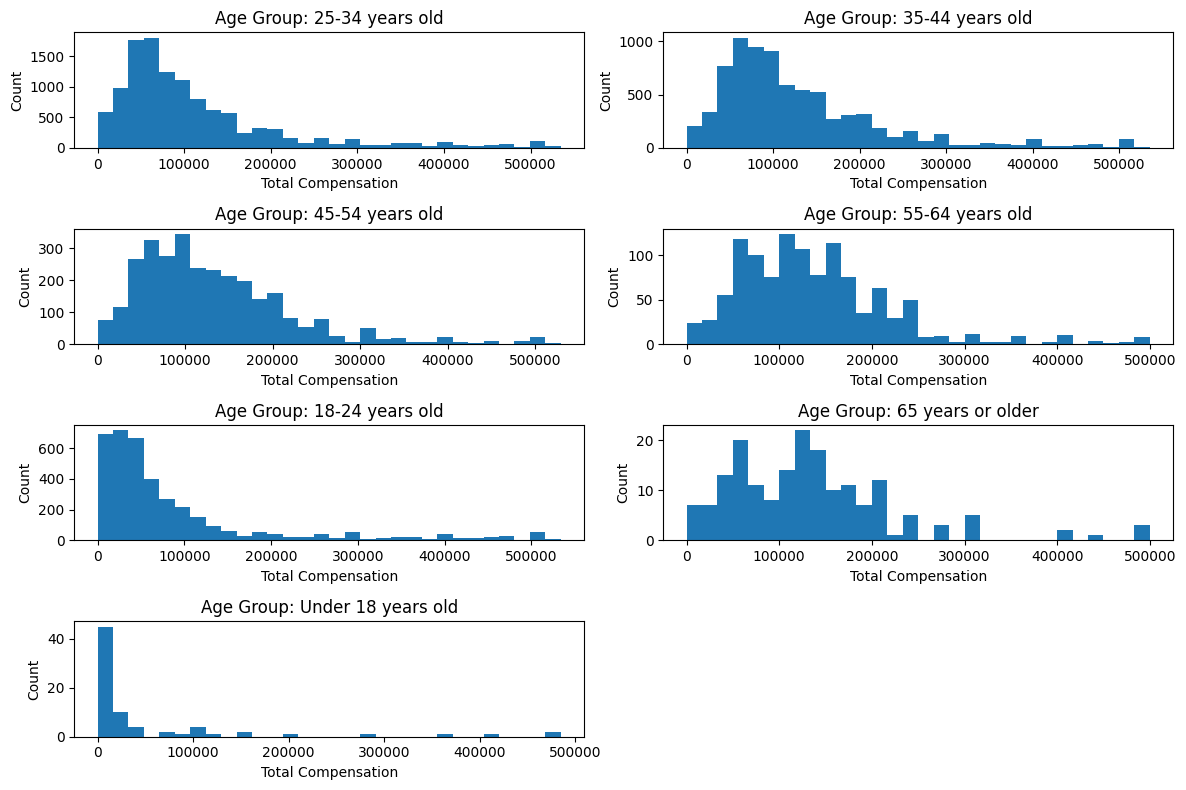

In [183]:
# Histogram Comparison of Total Compensation by Age Group

# Query / Clean & structure DataFrame
QUERY = 'SELECT Age, CompTotal FROM main'
hist3_df = pd.read_sql_query(QUERY, conn)

hist3_df = hist3_df[hist3_df['CompTotal'].isin(total_comp_df_filtered['CompTotal'])]
hist3_df = hist3_df[hist3_df['Age'] != 'Prefer not to say']
#print(hist3_df['Age'].value_counts())

# Plot Histograms based on Age Groups
age_groups = hist3_df['Age'].unique()
n_groups = len(age_groups)

cols = 2
rows = (n_groups + 1) // 2

plt.figure(figsize=(12,8))

for i, group in enumerate(age_groups, start=1):
    plt.subplot(rows,cols,i)
    plt.hist(hist3_df[hist3_df['Age'] == group]['CompTotal'], bins=30)
    plt.title(f'Age Group: {group}')
    plt.xlabel('Total Compensation')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

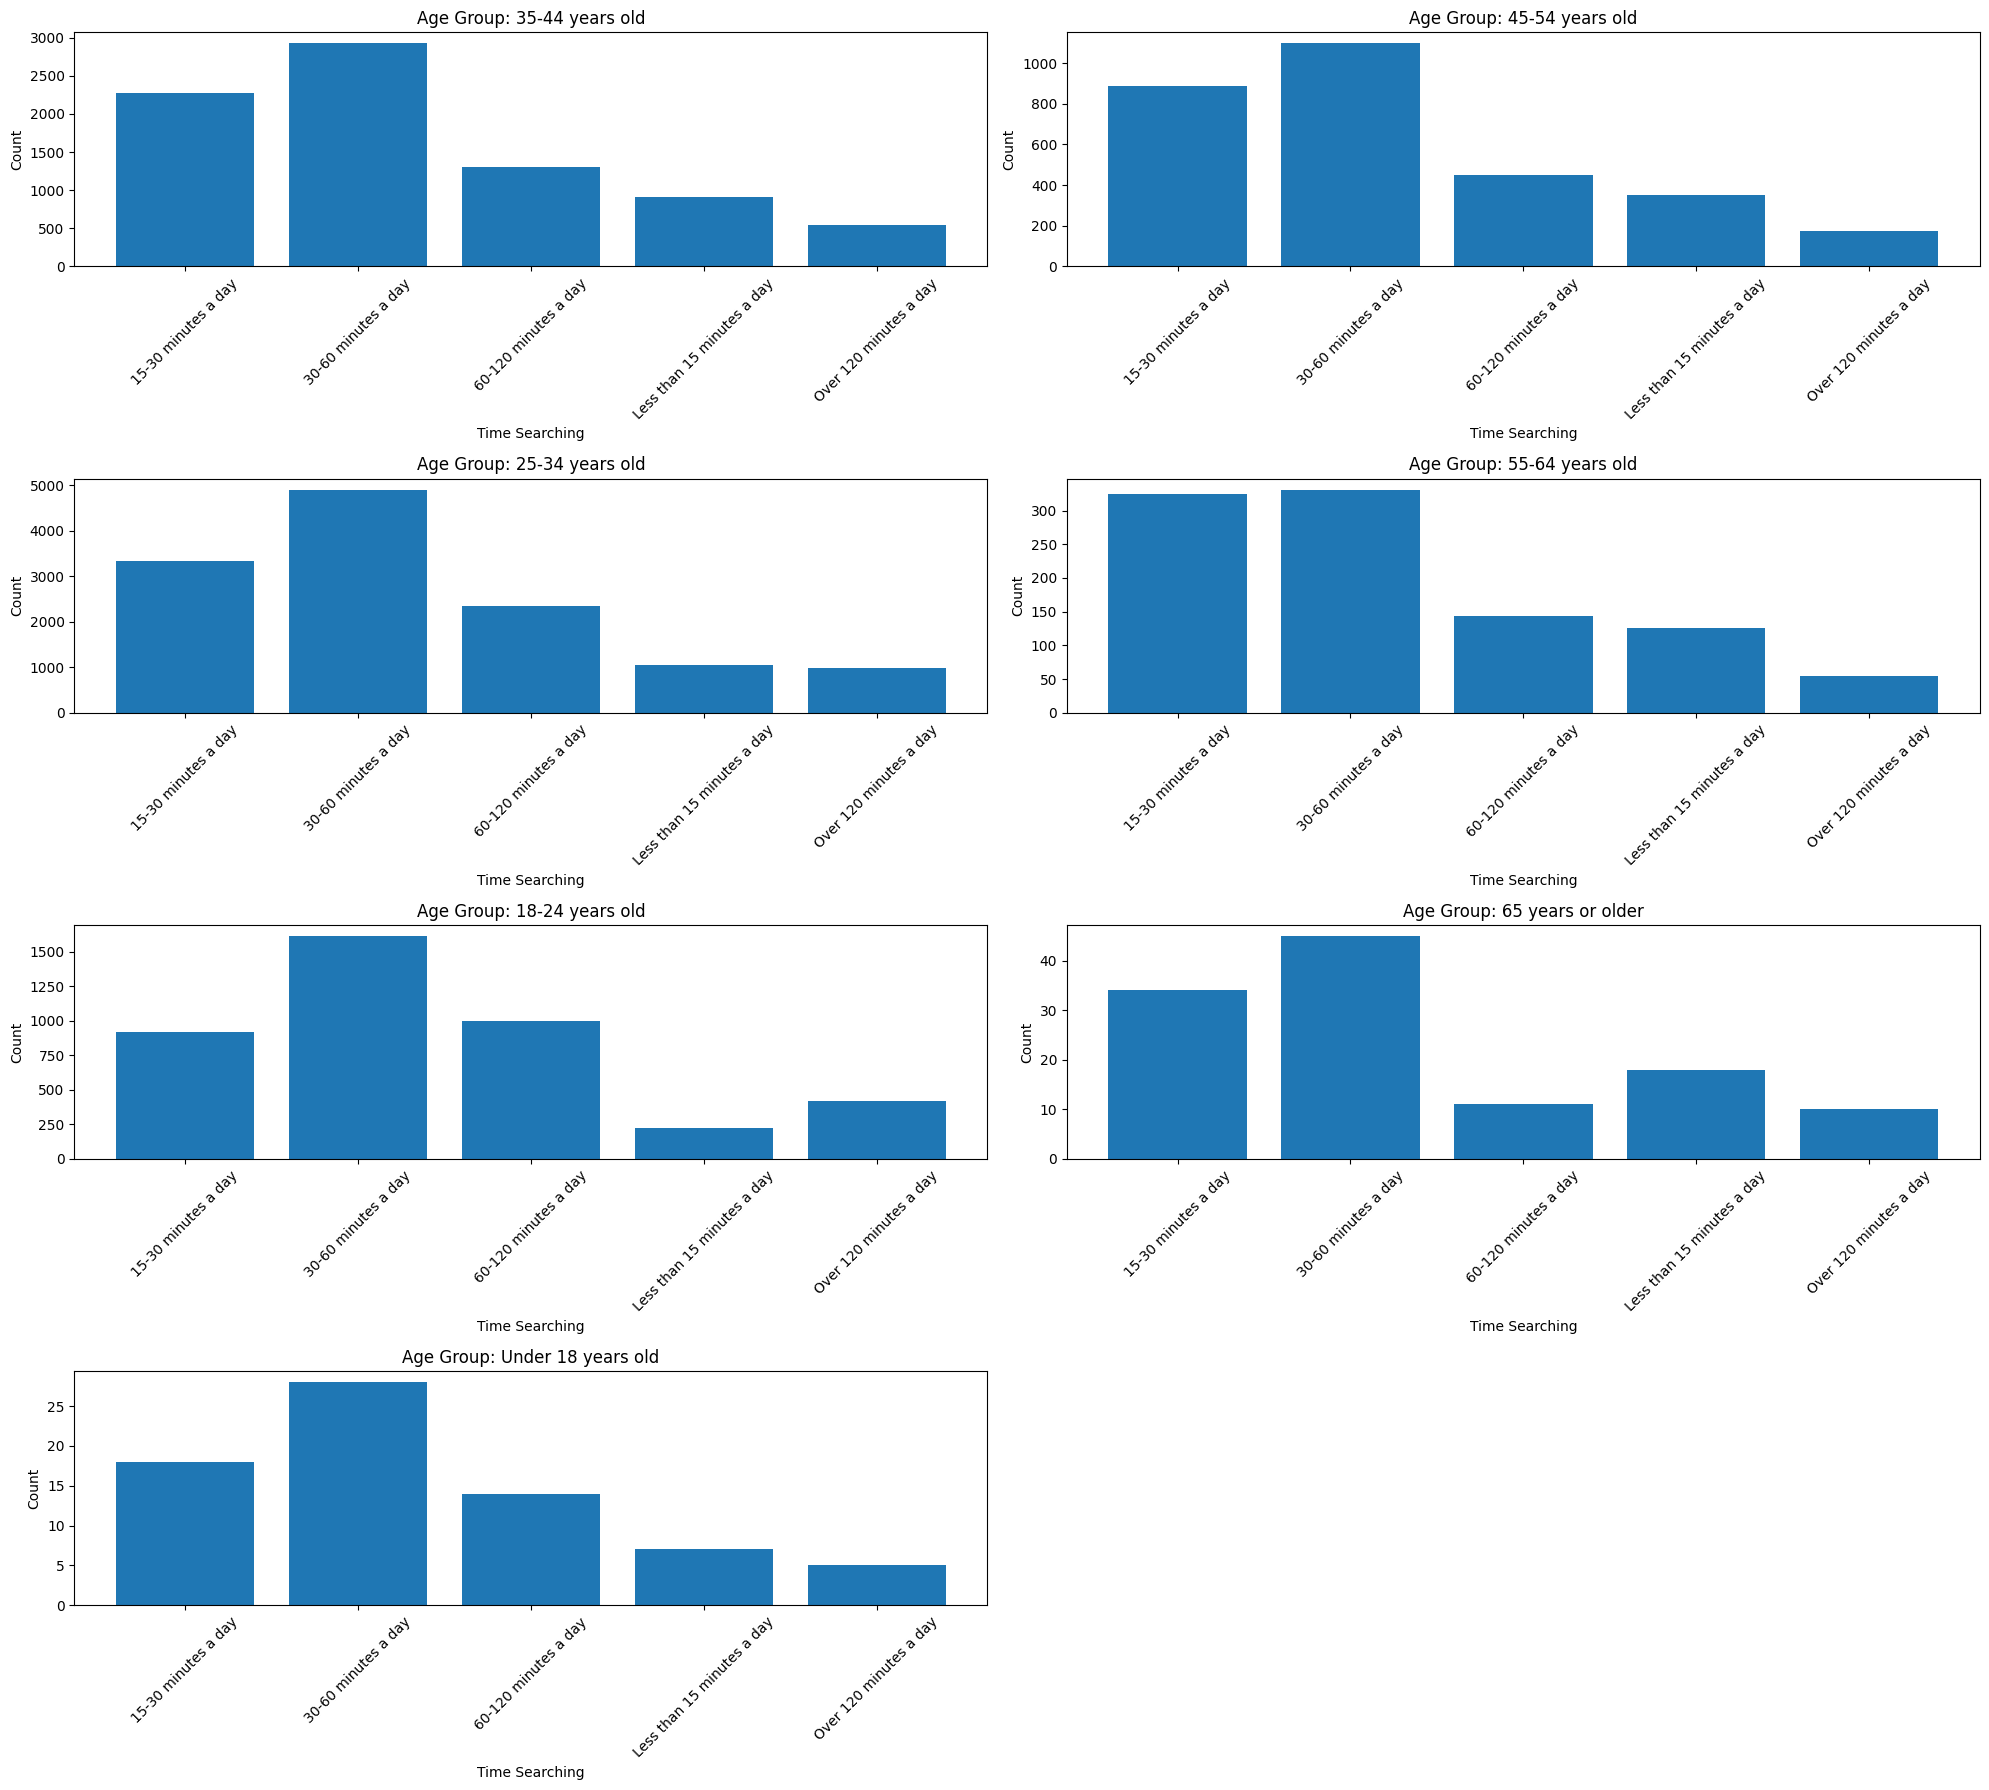

In [184]:
# Histogram of TimeSearching for Different Age Groups

# Query / Clean & structure DataFrame
QUERY = 'SELECT Age, TimeSearching FROM main'
hist4_df = pd.read_sql_query(QUERY, conn)
hist4_df = hist4_df[hist4_df['Age'] != 'Prefer not to say']
hist4_df = hist4_df.dropna(subset=['Age', 'TimeSearching'])
#print(hist4_df.head())
#print(hist4_df['TimeSearching'].value_counts())

# Plot Histograms based on Age Groups
age_groups = hist4_df['Age'].unique()
n_groups = len(age_groups)
cols = 2
rows = (n_groups + 1) // 2

plt.figure(figsize=(20,18))

for i, group in enumerate(age_groups, start=1):
    plt.subplot(rows,cols,i)
    counts = hist4_df[hist4_df['Age'] == group]['TimeSearching'].value_counts().sort_index()
    plt.bar(counts.index, counts.values)
    plt.title(f'Age Group: {group}')
    plt.xlabel('Time Searching')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Top 5 Databases: DatabaseList
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


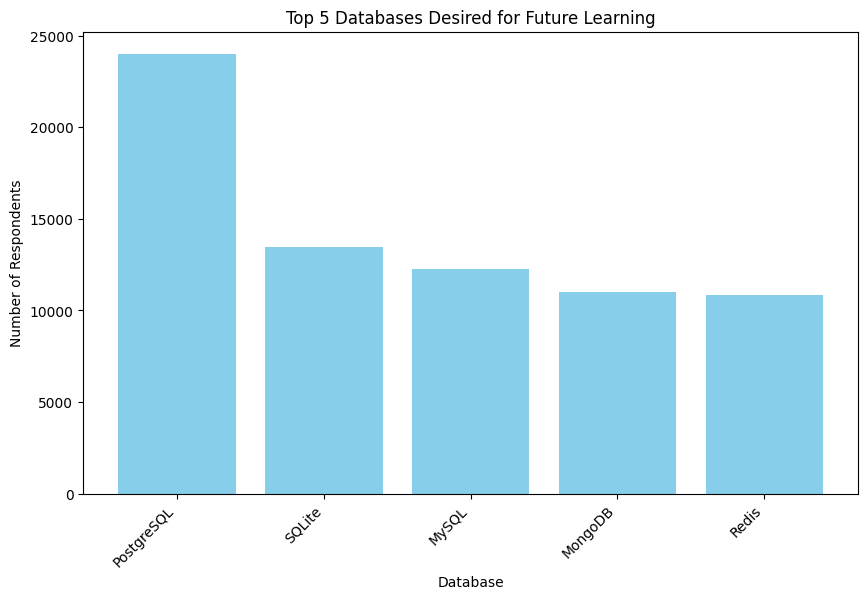

In [185]:
## Visualizing the Composition of the Data
# Histograms of Most Desired Databases

# Connect data to dataframe
QUERY = 'SELECT DatabaseWantToWorkWith FROM main'
hist5_df = pd.read_sql_query(QUERY, conn)
hist5_df = hist5_df[hist5_df['DatabaseWantToWorkWith'].notna()]

# explode data
hist5_df['DatabaseList'] = hist5_df['DatabaseWantToWorkWith'].str.split(';')
hist5_exploded = hist5_df.explode('DatabaseList')
#hist5_exploded['DatabaseList'].value_counts()

top5_databases = hist5_exploded['DatabaseList'].value_counts().head(5)
print("Top 5 Databases:", top5_databases)

# Histogram
plt.figure(figsize=(10,6))
plt.bar(top5_databases.index, top5_databases.values, color='skyblue')
plt.title('Top 5 Databases Desired for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

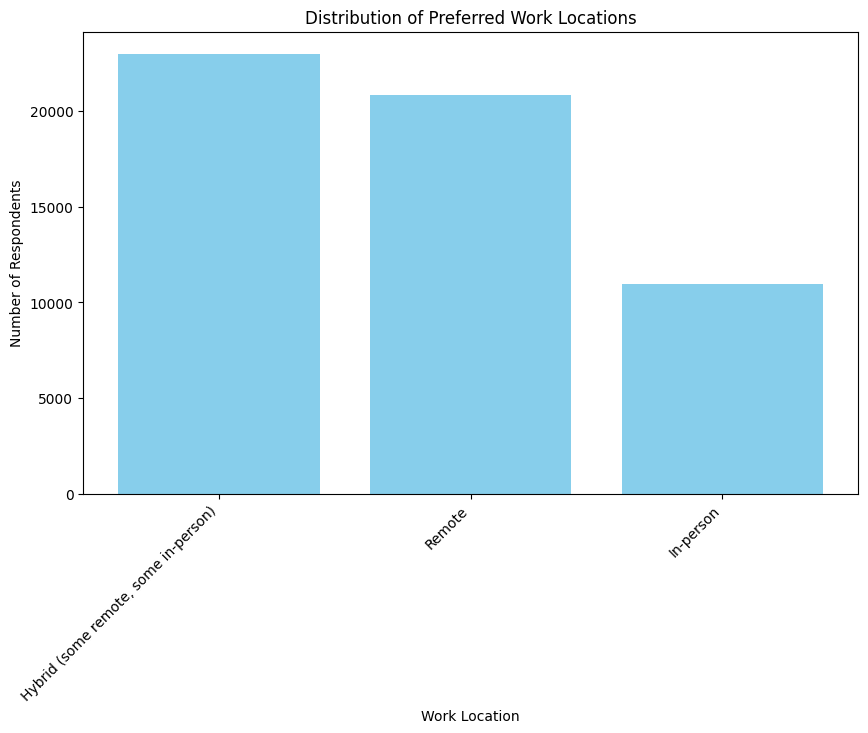

In [186]:
# Histogram of Preferred Work Locations

QUERY = 'SELECT RemoteWork FROM main'

hist6_df = pd.read_sql_query(QUERY, conn)
hist6_df = hist6_df.dropna()

counts = hist6_df['RemoteWork'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values, color='skyblue')
plt.title('Distribution of Preferred Work Locations')
plt.xlabel('Work Location')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

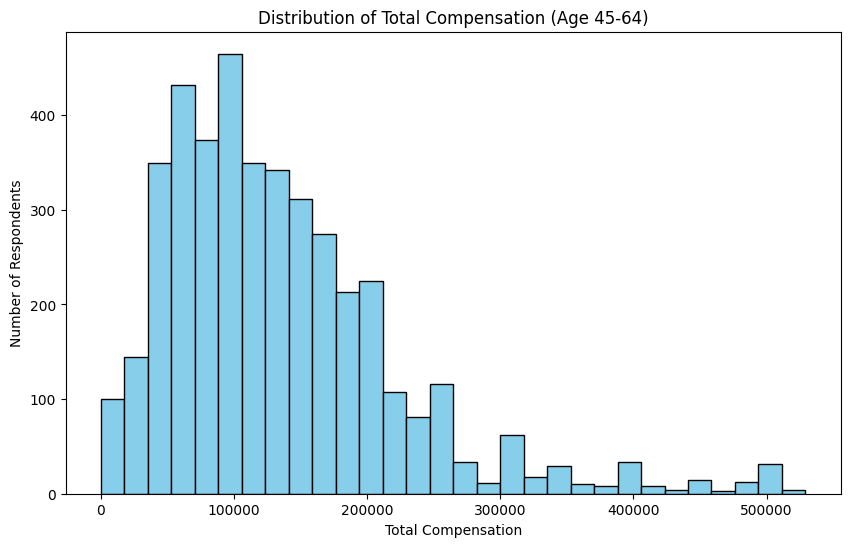

In [189]:
## Visualizing Comparison of Data
# Histogram of Median Total Compensation for ages 45-65

# 1. Query data and create a new dataframe
QUERY = 'SELECT Age, CompTotal FROM main'
hist7_df = pd.read_sql_query(QUERY, conn)
#print(hist7_df['Age'].value_counts())

# 2. clean data / create age group
    # keep only filtered CompTotal rows
hist7_df = hist7_df[hist7_df['CompTotal'].isin(total_comp_df_filtered['CompTotal'])]
    # remove Perfere not to say category
hist7_df = hist7_df[hist7_df['Age'] != 'Prefer not to say']
    # filter age group
hist7_45_60 = hist7_df[hist7_df['Age'].isin(['45-54 years old', '55-64 years old'])]
#print(hist7_45_60['Age'].value_counts())

# 3. Plot Histogram
plt.figure(figsize=(10,6))
plt.hist(hist7_45_60['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (Age 45-64)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.show()

Empty DataFrame
Columns: [JobSat, YearsCodePro, YearsBin]
Index: []


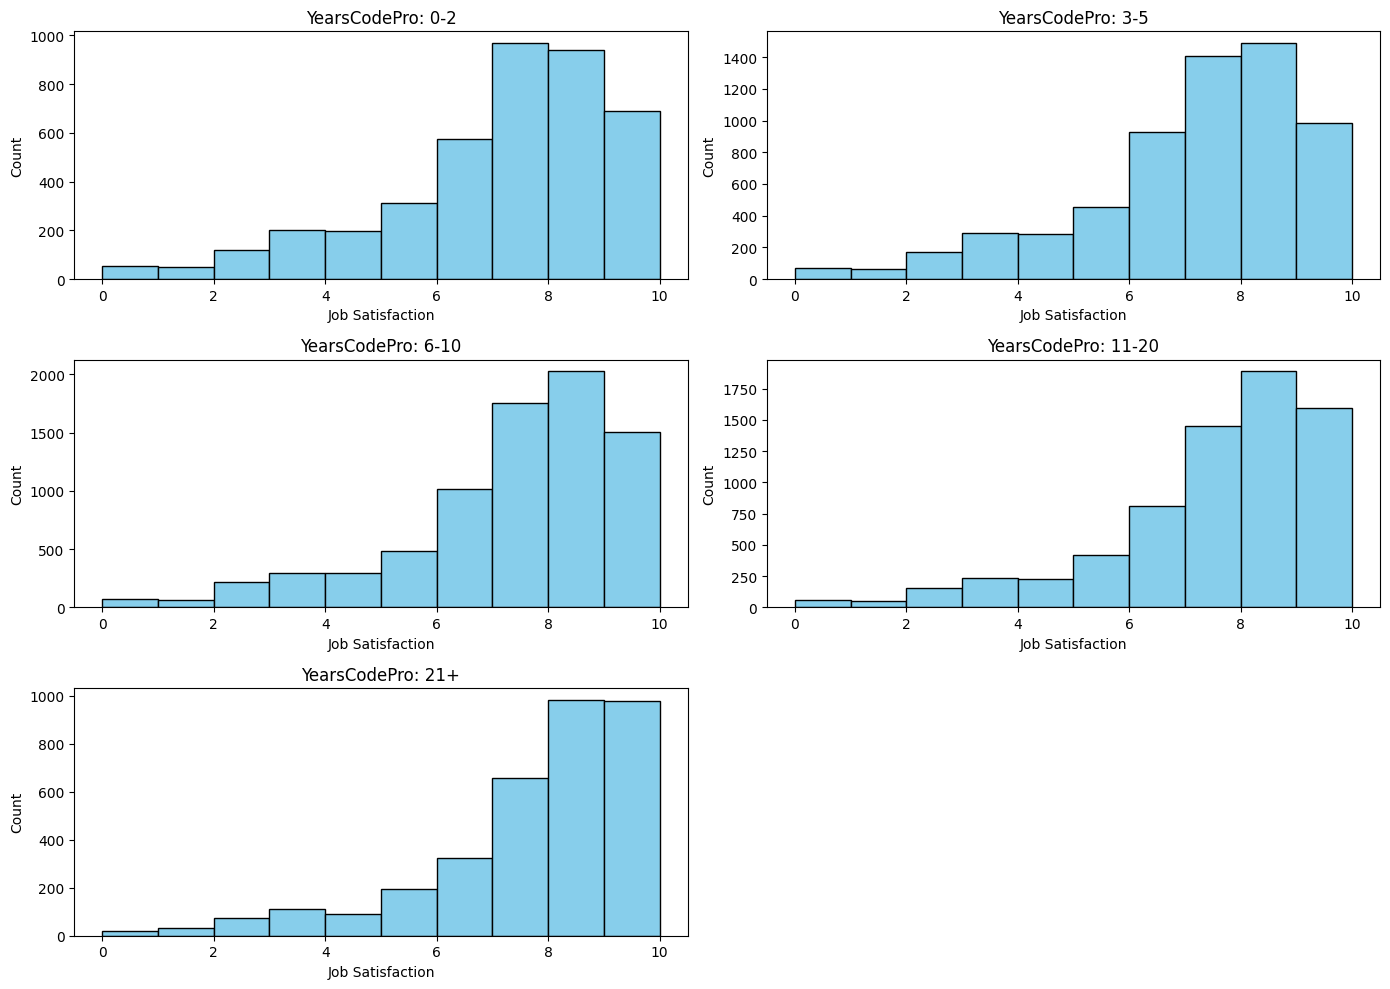

In [190]:
# Histogram of Job Satisfaction by Professional Years Coding

QUERY = 'SELECT JobSat, YearsCodePro FROM main'
hist8_df = pd.read_sql_query(QUERY, conn)
hist8_df = hist8_df.dropna(subset=['YearsCodePro', 'JobSat'])

# Convert Special categories to numeric
hist8_df['YearsCodePro'] = hist8_df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)
#print(hist8_df['YearsCodePro'].value_counts())
# bin YearsCodePro
bins = [0, 2, 5, 10, 20, hist8_df['YearsCodePro'].max()+1]
labels= ['0-2', '3-5', '6-10', '11-20', '21+']
hist8_df['YearsBin'] = pd.cut(hist8_df['YearsCodePro'], bins=bins, labels=labels)
#print(hist8_df.head())
print(hist8_df[hist8_df['YearsBin'].isna()])

# plot each histogram
year_bins = hist8_df['YearsBin'].cat.categories
n_groups = len(year_bins)
cols = 2
rows = (n_groups + 1) // 2
plt.figure(figsize=(14,10))

for i, group in enumerate(year_bins, start=1):
    subset = hist8_df[hist8_df['YearsBin'] == group]
    plt.subplot(rows,cols,i)
    plt.hist(subset['JobSat'], bins=10, edgecolor='black', color='skyblue')
    plt.title(f"YearsCodePro: {group}")
    plt.xlabel('Job Satisfaction')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [191]:
# Close Database Connection
conn.close()